# Neural Networks for Handwritten Digit Recognition


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib widget
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from public_tests import * 

from autils import *
from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)

2023-11-28 20:44:37.537283: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-28 20:44:37.894155: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-28 20:44:37.894215: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-28 20:44:37.895036: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-28 20:44:37.968344: I tensorflow/core/platform/cpu_feature_g

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

/home/jp/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
# # load dataset
# X, y = load_data()
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

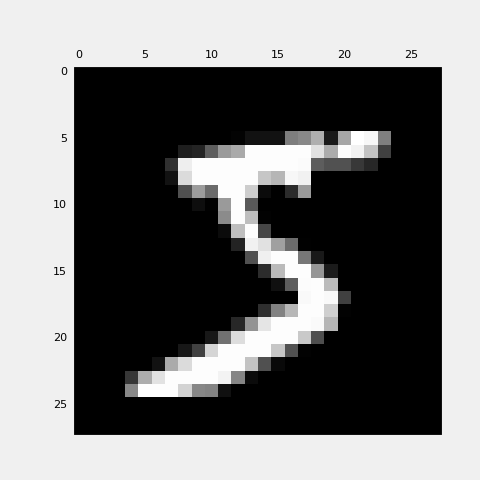

In [4]:
import matplotlib.pyplot as plt
import numpy as np


a = X[0].reshape(28, 28)
plt.matshow(a, cmap='gray')

In [5]:
y = y.astype(np.uint8)

In [6]:
X_train, X_test, y_train, y_test = X[:50000], X[50000:60000], y[:50000], y[50000:60000]

In [7]:
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [               
        ### START CODE HERE ### 
        
        Dense(25, activation = 'relu', name="L1"),
        Dense(15, activation = 'relu', name="L2"),
        Dense(10, name="L3")
        
        ### END CODE HERE ### 
    ], name = "my_model" 
)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X_train,y_train,
    epochs=40
)

2023-11-28 20:45:05.982699: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:59:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-28 20:45:06.011856: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:59:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-28 20:45:06.011944: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:59:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-28 20:45:06.015069: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:59:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-28 20:45:06.015177: I tensorflow/compile

Epoch 1/40


2023-11-28 20:45:16.303860: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-28 20:45:16.557148: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f2e255e66e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-28 20:45:16.557221: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce MX450, Compute Capability 7.5
2023-11-28 20:45:16.579229: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-28 20:45:16.639893: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-11-28 20:45:16.798946: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 [==============================] - 16s 8ms/step - loss: 2.1652
Epoch 2/40
1563/1563 [==============================] - 12s 7ms/step - loss: 1.0148
Epoch 3/40
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6534
Epoch 4/40
1563/1563 [==============================] - 12s 7ms/step - loss: 0.4190
Epoch 5/40
1563/1563 [==============================] - 12s 8ms/step - loss: 0.3443
Epoch 6/40
1563/1563 [==============================] - 12s 7ms/step - loss: 0.2919
Epoch 7/40
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2645
Epoch 8/40
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2492
Epoch 9/40
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2322
Epoch 10/40
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2212
Epoch 11/40
1563/1563 [==============================] - 10s 7ms/step - loss: 0.2115
Epoch 12/40
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1984


In [8]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                19625     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 20175 (78.81 KB)
Trainable params: 20175 (78.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


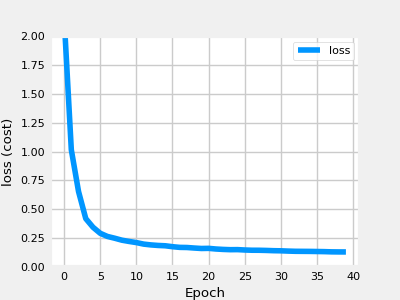

In [9]:
plot_loss_tf(history)

#### Prediction 
To make a prediction, use Keras `predict`. Below, X[1015] contains an image of a two.

1/1 [==============================] - 0s 37ms/step
 predicting a Two: 
[[ 7.59  1.09  3.84 -0.05  1.67  2.52  3.49  1.63  3.59  3.24]]
 Largest Prediction index: 0


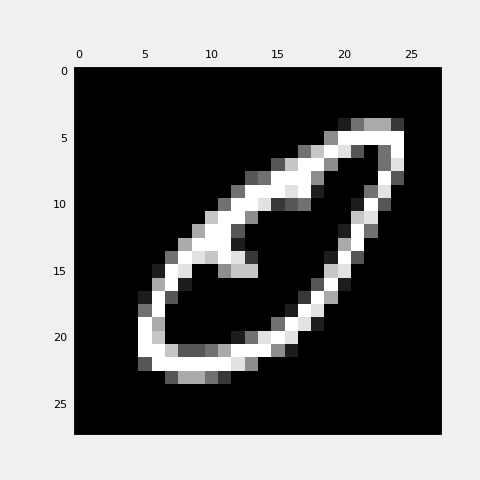

In [12]:
image_of_two = X[1015]
# display_digit(image_of_two)

prediction = model.predict(image_of_two.reshape(1,784))  # prediction

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")


b = image_of_two.reshape(28, 28)
plt.matshow(b, cmap='gray')